In [1]:
import os
import numpy   as np
import nibabel as nib
import nilearn
import nipype
import matplotlib.pyplot as plt

from nilearn import plotting

/home/swapna91/virtualenvs/Uvenv/lib/python3.8/site-packages/nilearn/datasets/__init__.py:87: FutureWarning: Fetchers from the nilearn.datasets module will be updated in version 0.9 to return python strings instead of bytes and Pandas dataframes instead of Numpy arrays.
  warn("Fetchers from the nilearn.datasets module will be "


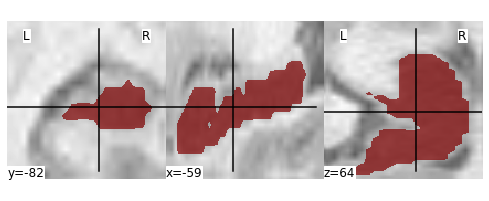

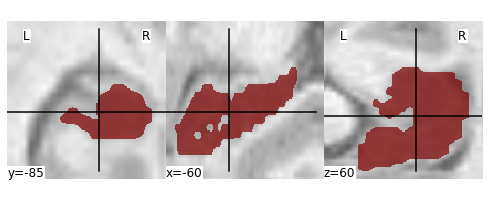

In [7]:
subject_id='ADB0015'
imgL = nib.load('/home/swapna91/scratch/UMAGeT_21v1/data/data_net2/brains/'+subject_id+'_t1_L.nii')
mskL = nib.load('/home/swapna91/scratch/UMAGeT_21v1/data/data_net2/target_labels/'+subject_id+'_labels_L.nii')

imgR = nib.load('/home/swapna91/scratch/UMAGeT_21v1/data/data_net2/brains/'+subject_id+'_t1_R.nii')
mskR = nib.load('/home/swapna91/scratch/UMAGeT_21v1/data/data_net2/target_labels/'+subject_id+'_labels_R.nii')

plotting.plot_roi(roi_img=mskL, bg_img=imgL, cmap=plt.cm.get_cmap('jet', 1))
plotting.plot_roi(roi_img=mskR, bg_img=imgR, cmap=plt.cm.get_cmap('jet', 1))

In [40]:

no_filenames = 15
np.random.choice(11, round(no_filenames*1.4), p=[0.6, 0.08, 0.07, 0.06, 0.05, 0.04, 0.03, 0.03, 0.02, 0.01, 0.01])

array([6, 4, 0, 8, 0, 0, 0, 3, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 7, 0])

In [39]:
no_filenames = 5
a = np.random.choice([0,1], round(no_filenames*1.4), p=[0.6, 0.4])
a

array([0, 0, 0, 0, 1, 0, 0])

In [68]:
import SimpleITK as sitk
from scipy import ndimage
from IPython.display import Image, display

img0 = sitk.ReadImage('/home/swapna91/scratch/UMAGeT_21v1/data/brains_aug/ADB0019_t1_t1_n4corrG0r00.nii', imageIO="NiftiImageIO")
img1 = Image(ndimage.rotate(sitk.GetArrayFromImage(img0), 45))

display(img1)
#plotting.plot_roi(roi_img=msk, bg_img=img, cmap=plt.cm.get_cmap('jet', 1))

In [50]:
import SimpleITK as sitk
from skimage import io
from scipy import ndimage, misc
import matplotlib.pyplot as plt

img0 = nib.load('/home/swapna91/scratch/UMAGeT_21v1/data/brains_aug/ADB0019_t1_t1_n4corrG0r00.nii').get_fdata()
img1 = ndimage.rotate(img0, 0)

In [46]:
def display(im3d, cmap="gray", step=7):
    _, axes = plt.subplots(nrows=3, ncols=6, figsize=(16, 14))

    vmin = im3d.min()
    vmax = im3d.max()

    for ax, image in zip(axes.flatten(), im3d[::step]):
        ax.imshow(image, cmap=cmap, vmin=vmin, vmax=vmax)
        ax.set_xticks([])
        ax.set_yticks([])

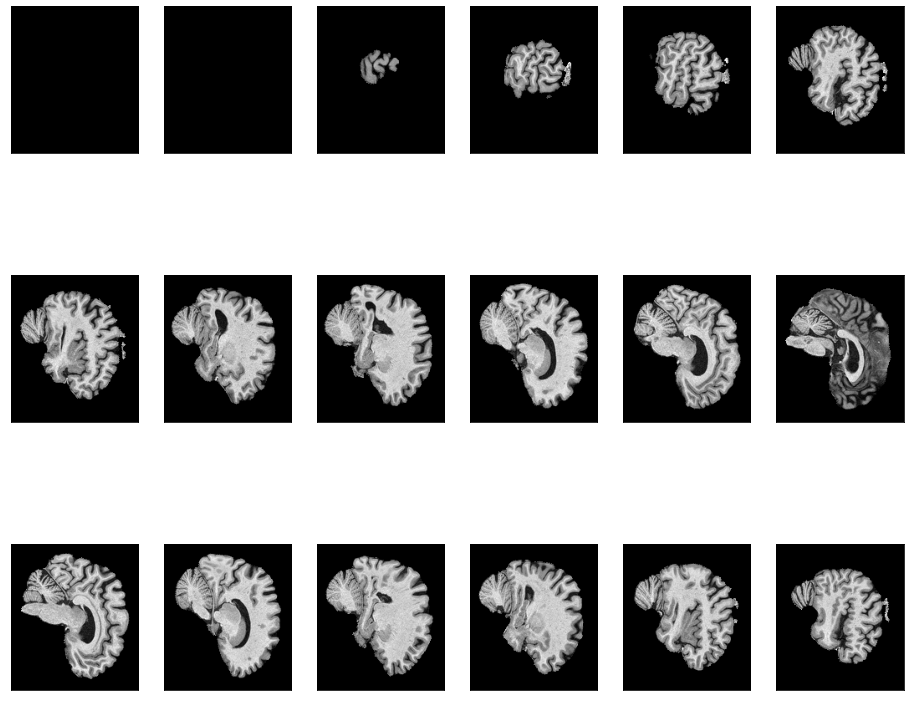

In [51]:
display(img1)

In [55]:
img0 = nib.load('/home/swapna91/scratch/UMAGeT_21v1/data/brains_aug/ADB0043_t1_t1_n4corrG1r00.nii').get_fdata()
img1 = ndimage.rotate(img0, 0)

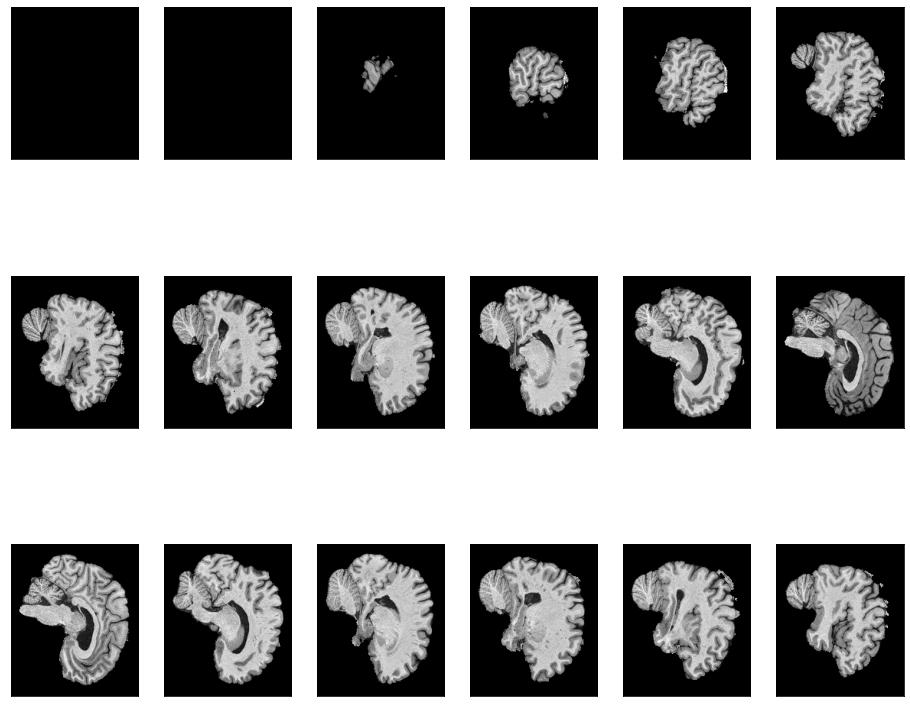

In [56]:
display(img1)